In [59]:
import h5py
import numpy as np
from rjd import *
from other_jd_algorithms import *
from experiments_util import offdiagonal_frobenius_square
from time import time
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [7]:
labels_file = 'Cospectra.mat'
f = h5py.File(labels_file)
datasets_mat = f['S']
print(len(datasets_mat))
datasets = []
for dataset_label in datasets_mat:
    data_labels = np.array(f[dataset_label])
    a = np.array([np.array(f[data_label]) for data_label in data_labels])
    datasets.append(a)

84


In [5]:
algorithm_dict = {
    0 : 'JADE',
    1 : 'FFDIAG',
    2 : 'PHAM',
    3 : 'QNDIAG',
    4 : 'DRJD'
}

algorithm_names = ['JADE','FFDIAG','PHAM','QNDIAG','DRJD']
def bench(dataset, trails = 20):
    algorithms = [rjd, ortho_ffdiag, ajd_pham, lambda x:qndiag(x,ortho=True),
                  lambda x :randomized_jd_deflat(x,trails=3)]
    times = np.zeros((len(algorithms),trails))
    for i in range(trails):
        for j,alg in enumerate(algorithms):
            start = time()
            alg(dataset)
            end = time()
            times[j,i] =1000 * (end - start)
    return times
    

In [64]:
for dataset in datasets:
    print("Original Error: ", offdiagonal_frobenius_square(dataset), dataset.shape)
    
    Q,_ = rjd(dataset,)
    print("JADE Error: ", offdiagonal_frobenius_square(Q.T @ dataset @ Q))
    #print(Q.T @ dataset @ Q)
    Q,_ = ajd_pham(dataset)
    print("Pham Error: ", offdiagonal_frobenius_square(Q @ dataset @ Q.T))
    #print(Q @ dataset @ Q.T)
    Q1 = randomized_jd_deflat_complex(dataset,trails=3)
    print("DRJD Error: ", offdiagonal_frobenius_square(Q1.T @ dataset @ Q1))
    Q = ortho_ffdiag(dataset)
    print("FFDIAG Error: ", offdiagonal_frobenius_square(Q @ dataset @ Q.T))
    Q,_ = qndiag(dataset, tol=1e-4, ortho=True)
    print("QNDIAG Error: ", offdiagonal_frobenius_square(Q @ dataset @ Q.T))
    

Original Error:  4.369096825406976 (47, 18, 18)
JADE Error:  0.9126489490272656
Pham Error:  4.981767480263277
DRJD Error:  1.7134191062295365
FFDIAG Error:  0.9126497308746789
QNDIAG Error:  1.2400068451193782
Original Error:  2.1043353386594297 (47, 18, 18)
JADE Error:  0.6720163017471823
Pham Error:  3.4433629174485008
DRJD Error:  1.0988423651030421
FFDIAG Error:  0.6720506373765187
QNDIAG Error:  0.8676581943862522
Original Error:  5.000077328643073 (47, 18, 18)
JADE Error:  1.167019296908806
Pham Error:  8.234681771432623
DRJD Error:  2.13537769102477
FFDIAG Error:  1.1670200141395362
QNDIAG Error:  1.801260615881431
Original Error:  4.430883695421393 (47, 19, 19)
JADE Error:  0.7244322599252836
Pham Error:  9.044374901710734
DRJD Error:  1.7730535426300245
FFDIAG Error:  0.7244326384806126
QNDIAG Error:  1.188402294381459
Original Error:  2.913295546764139 (47, 19, 19)
JADE Error:  0.47442252363513077
Pham Error:  5.820165311336351
DRJD Error:  1.0961770984840296
FFDIAG Error:  

JADE Error:  0.9763249876723314
Pham Error:  6.654805542698971
DRJD Error:  1.3890637289379073
FFDIAG Error:  0.9763263875176967
QNDIAG Error:  1.3469386205496237
Original Error:  6.8598696869826865 (47, 17, 17)
JADE Error:  0.9638084439400773
Pham Error:  11.118341821249368
DRJD Error:  1.6763801533237
FFDIAG Error:  0.9638096961595227
QNDIAG Error:  1.3251562755661992
Original Error:  2.4696848714574697 (47, 18, 18)
JADE Error:  0.8685346689399115
Pham Error:  4.8198686697793365
DRJD Error:  1.278376010134208
FFDIAG Error:  0.8685348458399926
QNDIAG Error:  1.158093465083731
Original Error:  4.834016433975123 (47, 18, 18)
JADE Error:  0.8346061572694427
Pham Error:  5.587782717235765
DRJD Error:  1.2861420520360811
FFDIAG Error:  0.8346065993286489
QNDIAG Error:  1.377774815866564
Original Error:  4.402601596552374 (47, 18, 18)
JADE Error:  1.426944534199471
Pham Error:  7.432083894112279
DRJD Error:  2.712560703318391
FFDIAG Error:  1.4269554877618909
QNDIAG Error:  1.94799358599454

JADE Error:  0.8529787765782595
Pham Error:  6.2154992946073895
DRJD Error:  1.347819320950414
FFDIAG Error:  0.8529794326313671
QNDIAG Error:  1.39409909894898
Original Error:  2.8088481484503665 (47, 19, 19)
JADE Error:  0.6138642801154809
Pham Error:  5.6144939728492025
DRJD Error:  0.869559836744398
FFDIAG Error:  0.6138645494867385
QNDIAG Error:  0.9824613384645056
Original Error:  5.645033967177562 (47, 19, 19)
JADE Error:  0.950485323928601
Pham Error:  13.411425378714686
DRJD Error:  1.3733697674956038
FFDIAG Error:  0.9504855883075553
QNDIAG Error:  1.9891177445427572
Original Error:  1.7071244491438142 (47, 19, 19)
JADE Error:  0.3860725607610297
Pham Error:  3.8454772813126157
DRJD Error:  0.5818674167637602
FFDIAG Error:  0.386073158245658
QNDIAG Error:  0.6307790329479592
Original Error:  4.241720882485096 (47, 17, 17)
JADE Error:  0.5315629459039802
Pham Error:  4.147198729408976
DRJD Error:  0.7612500530959991
FFDIAG Error:  0.5315631766052433
QNDIAG Error:  0.9887219537

In [4]:
repeats = 100
nEggs = len(datasets)
times = np.zeros((len(algorithm_dict), nEggs, repeats))
for i, dataset in enumerate(datasets):
    times[:,i,:] = bench(dataset,repeats)

KeyboardInterrupt: 

In [11]:
avg_times = np.mean(times,2)
order = np.argsort(avg_times,1)
times_sorted = np.array([ alg[order[i],:] for i, alg  in enumerate(times)])
#print(times_sorted)

c:\program files\python38\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.war

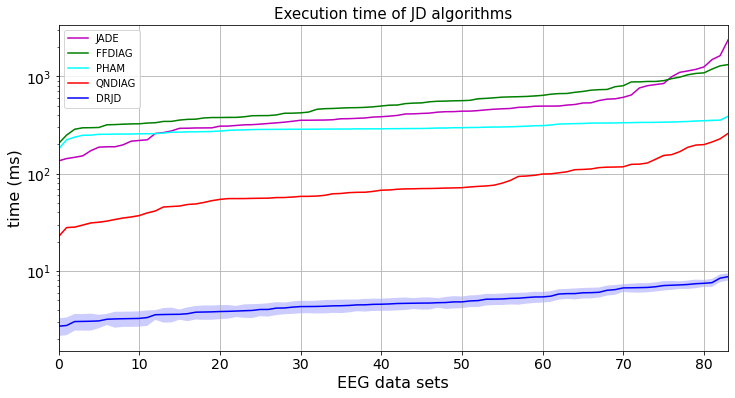

In [18]:
import seaborn as sns
markers = ['o','+','*','^','.']
colors = ['m','green','cyan','red','blue']
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(12, 6))
plt.title("Execution time of JD algorithms",fontsize=15)
plt.xlabel("EEG data sets",fontsize=16)
plt.ylabel("time (ms)",fontsize=16)
plt.legend(algorithm_names)
plt.yscale("log")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.xticks(range(nEggs))
for i in range(len(algorithm_dict)):
    sns.tsplot(data=times_sorted[i].T, color =colors[i], condition=algorithm_dict[i])
plt.savefig("jd_cospectra.svg")

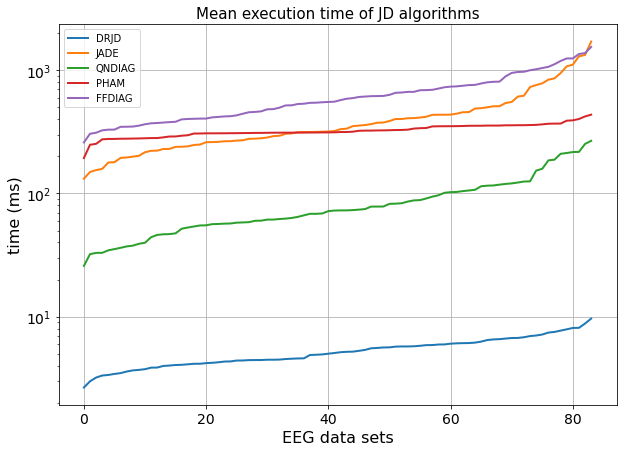

In [5]:
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(10, 7))
plt.plot(times,label=algorithm_names,linewidth=2)
plt.title("Mean execution time of JD algorithms",fontsize=15)
plt.xlabel("EEG data sets",fontsize=16)
plt.ylabel("time (ms)",fontsize=16)
plt.legend(algorithm_names)
plt.yscale("log")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

In [1]:
import seaborn as sns

In [80]:
sample = datasets[10]
print(sample.shape)
Q = randomized_jd_deflat(sample,3)
print(np.sum(offdiag_frobenius_square_by_column(Q.T @ sample @ Q)))
Q = qndiag(sample,ortho=True)[0]
print('--------')
print(np.sum(offdiag_frobenius_square_by_column(Q @ sample @ Q.T)))

(47, 18, 18)
1.7960526609730167
--------
1.4572866754443226


In [82]:
size = 0
for dataset in datasets:
    size = max(size,dataset.shape[1])
print(size)

19
